# **🍽️ Restaurant Tips Analysis**

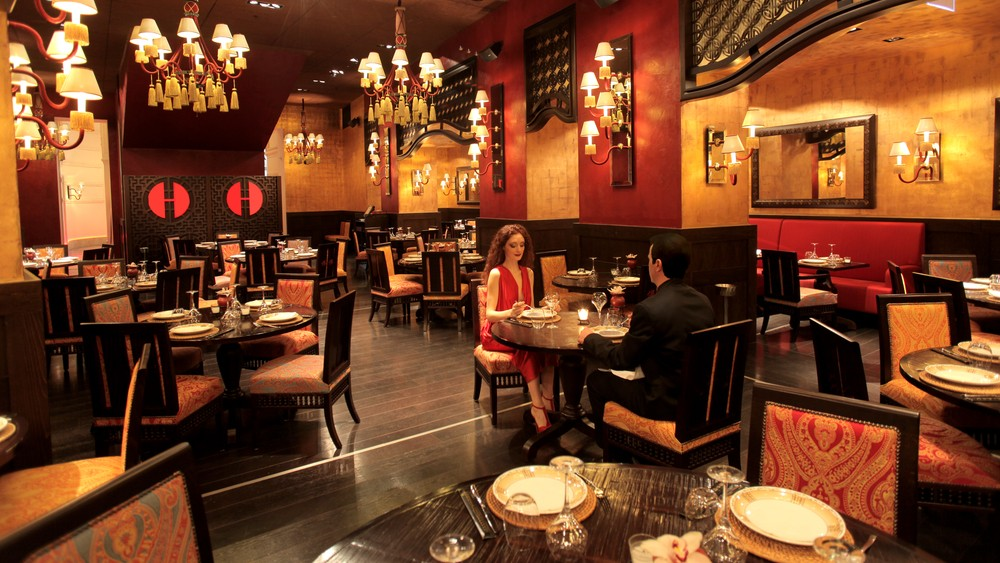

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [132]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [133]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [134]:
# PUT YOUR CODE HERE
df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [135]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

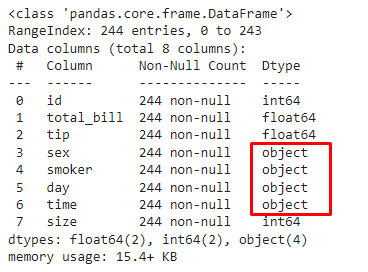

Let's fix their types and make them string:

In [136]:
# PUT YOUR CODE HERE
df1 = df.convert_dtypes()

Check again (output columns and their types):

In [137]:
# PUT YOUR CODE HERE
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [138]:
# PUT YOUR CODE HERE
df1.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [139]:
# PUT YOUR CODE HERE
#smokers_df = df1[df1['smoker'] == 'Yes']
smokers_df = df1.query('smoker == "Yes"')

Check whether everything is okay. Output a test sample (5 random rows):

In [140]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
67,67,3.07,1.0,Female,Yes,Sat,Dinner,1
101,101,15.38,3.0,Female,Yes,Fri,Dinner,2
217,217,11.59,1.5,Male,Yes,Sat,Dinner,2
174,174,16.82,4.0,Male,Yes,Sun,Dinner,2
100,100,11.35,2.5,Female,Yes,Fri,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [141]:
# PUT YOUR CODE HERE
non_smokers_df = df1.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [142]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
155,155,29.85,5.14,Female,No,Sun,Dinner,5
18,18,16.97,3.5,Female,No,Sun,Dinner,3
53,53,9.94,1.56,Male,No,Sun,Dinner,2
223,223,15.98,3.0,Female,No,Fri,Lunch,3
68,68,20.23,2.01,Male,No,Sat,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [143]:
# YOUR CODE
common_tip_min = df1['tip'].min()
common_tip_max = df1['tip'].max()
common_tip_mean = df1['tip'].mean()
common_tip_median = df1['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [144]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [145]:
# YOUR CODE
smokers_tip_min =  smokers_df['tip'].min()
smokers_tip_max =  smokers_df['tip'].max()
smokers_tip_mean =  smokers_df['tip'].mean()
smokers_tip_median =  smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [146]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [147]:
# YOUR CODE
non_smokers_tip_min =  non_smokers_df['tip'].min()
non_smokers_tip_max =  non_smokers_df['tip'].max()
non_smokers_tip_mean =  non_smokers_df['tip'].mean()
non_smokers_tip_median =  non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [148]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [149]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1:  Smokers reach the maximum tip, non-smokers don’t (Smokers have tipped up to 10.00 while non-smokers stop at 9.00)
2. Insight 2: Smokers tend to tip slightly more (both mean and median tip of smokers are higher than non-smokers)

**General conclusion:**
* Smokers tip slightly more and more consistently.
* Non-smokers may have more conservative tipping behavior overall.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

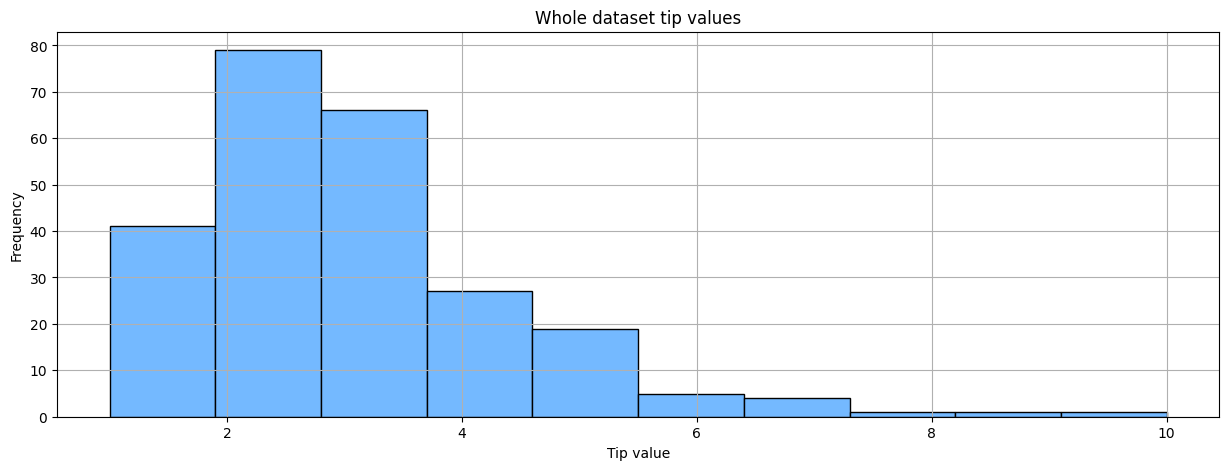

In [150]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(df1['tip'], bins=10, color='#74b9ff', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()


##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

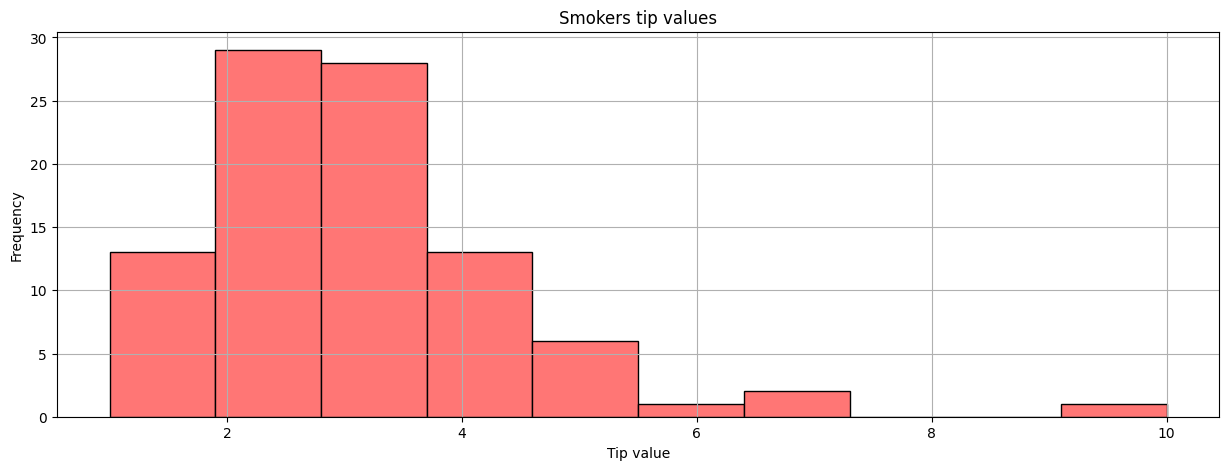

In [151]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(smokers_df['tip'], bins=10, color='#ff7675', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')

plt.grid(True)
plt.show()


##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

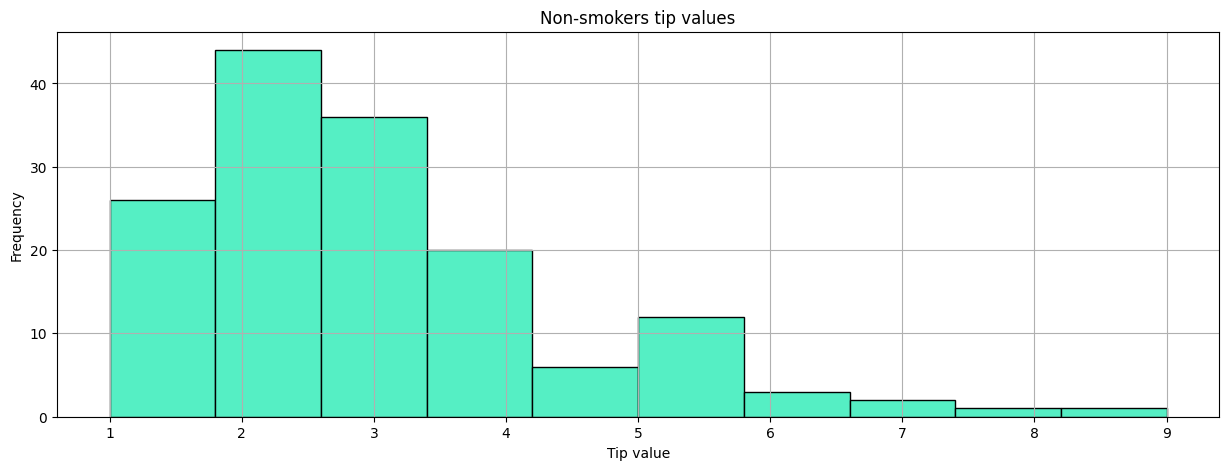

In [152]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(non_smokers_df['tip'], bins=10, color='#55efc4', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

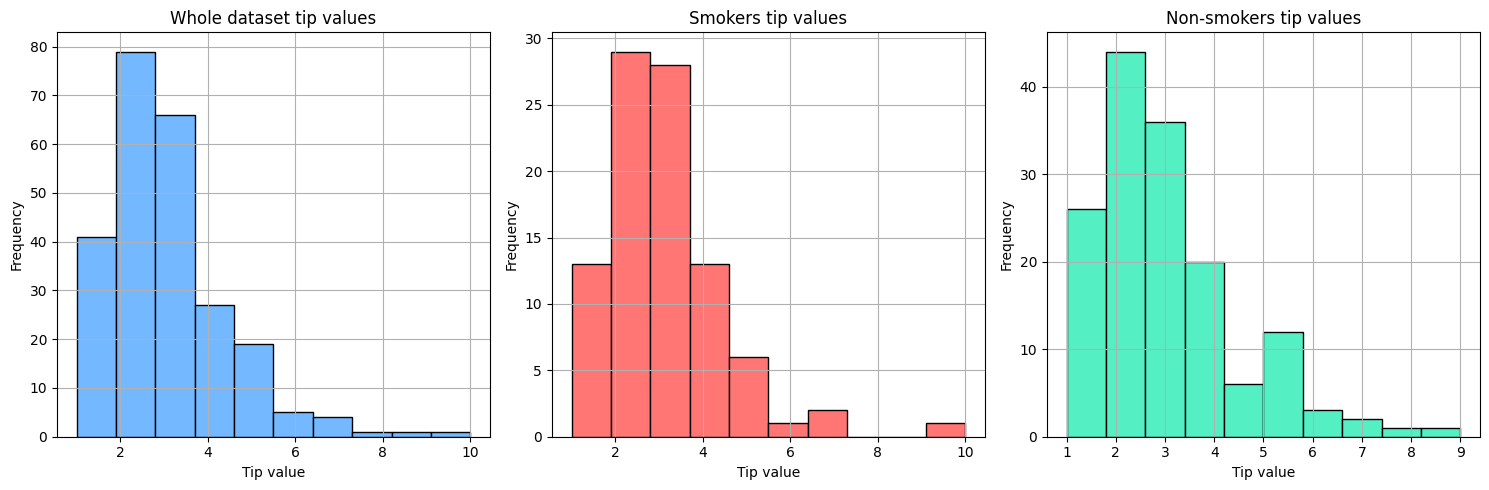

In [153]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

# all_tip
axis[0].hist(df1['tip'], bins=10, color='#74b9ff', edgecolor='black')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

# smokers_tip
axis[1].hist(smokers_df['tip'], bins=10, color='#ff7675', edgecolor='black')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Smokers tip values')
axis[1].grid(True)

# non_smokers_tip
axis[2].hist(non_smokers_df['tip'], bins=10, color='#55efc4', edgecolor='black')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Non-smokers tip values')
axis[2].grid(True)

plt.tight_layout()
plt.show()


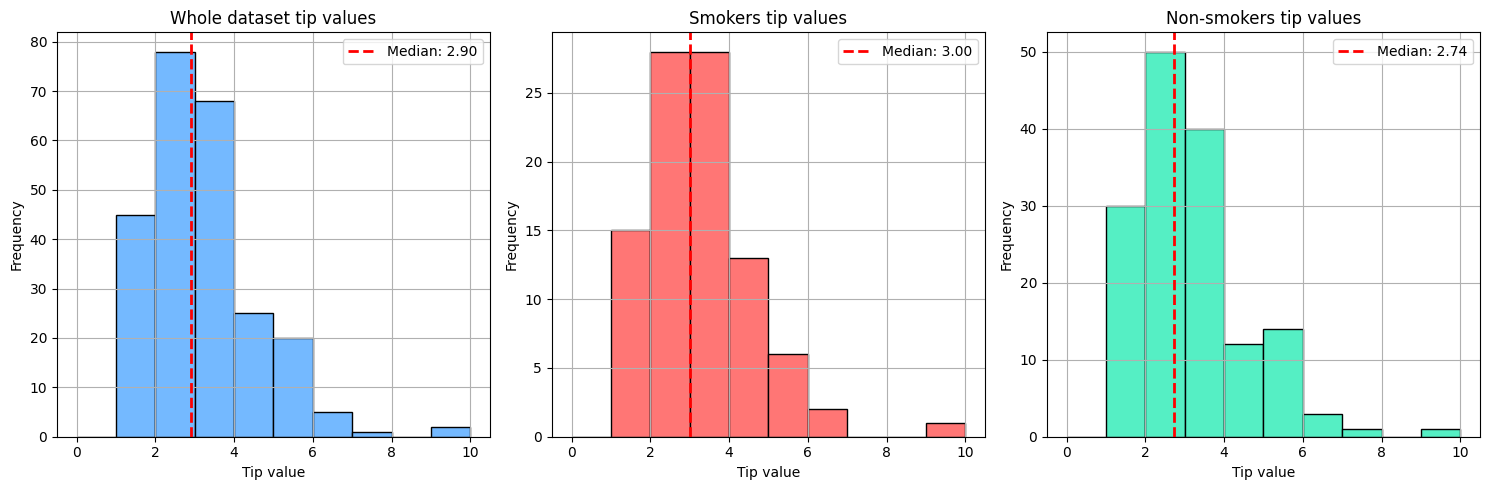

In [154]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

# all_tip
axis[0].hist(df1['tip'], bins=10, range=(0, 10), color='#74b9ff', edgecolor='black')
axis[0].axvline(common_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {common_tip_median:.2f}')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[0].legend(loc='upper right')

# smokers_tip
axis[1].hist(smokers_df['tip'], bins=10, range=(0, 10), color='#ff7675', edgecolor='black')
axis[1].axvline(smokers_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {smokers_tip_median:.2f}')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Smokers tip values')
axis[1].grid(True)
axis[1].legend(loc='upper right')

# non_smokers_tip
axis[2].hist(non_smokers_df['tip'], bins=10, range=(0, 10), color='#55efc4', edgecolor='black')
axis[2].axvline(non_smokers_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {non_smokers_tip_median:.2f}')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Non-smokers tip values')
axis[2].grid(True)
axis[2].legend(loc='upper right')

plt.tight_layout()
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1: Smokers — Tip Value Insights

  * Smoker median tip (\$3.00) is higher than non-smokers (\$2.74) and slightly higher than the overall median (\$2.90).
  * Most tips range from \$2 to \$4, the distribution is broader, with a few extreme tips reaching up to \$10.
  * Smokers are more likely to leave larger tips, even though they are fewer in number. This suggests a subset of smokers are very generous, possibly in social or leisure-driven settings.
  * Tips range from low to high, suggesting less consistency and more influence by external factors (e.g., mood, company, alcohol, etc.).

2. Insight 2: Non-Smokers — Tip Value Insights
  * Non-Smokers median tip (\$2.74) slightly lower than smokers and below the overall, indicates a more conservative tipping behavior.
  * Strong peak around \$2.5 to \$3.5, with very little extension beyond \$6, the distribution more compact and consistent than smokers.
  * Less likely to give extremely large tips. The histogram is symmetrical and tightly packed, meaning non-smokers tip within a fairly narrow, stable range.


**General conclusion:**

Smokers tend to tip more generously on average and show higher variability. They may be more impulsive or socially influenced tippers, which could be linked to the contexts in which smoking is allowed or more common (e.g., more relaxed or informal dining environments) → could respond well to upgrades, rewards, or dynamic pricing

Non-smokers exhibit more uniform and restrained tipping patterns. They are likely more deliberate and less influenced by emotional or social dynamics. This makes them easier to predict and possibly more responsive to standardized service experiences → might value predictability, loyalty programs, and clear value-for-money incentives.



### **👨👩 Do males give more tips?**

**Perform** the same steps based on the column **sex**.

Let's figure out the difference between males and females in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate males and females**

Create a new dataframe `males_df` containing only info about males.

In [155]:
# PUT YOUR CODE HERE
males_df = df1.query('sex == "Male"')

Check whether everything is okay. Output a test sample (5 random rows):

In [156]:
# PUT YOUR CODE HERE
males_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
230,230,24.01,2.0,Male,Yes,Sat,Dinner,4
59,59,48.27,6.73,Male,No,Sat,Dinner,4
61,61,13.81,2.0,Male,Yes,Sat,Dinner,2
150,150,14.07,2.5,Male,No,Sun,Dinner,2
175,175,32.9,3.11,Male,Yes,Sun,Dinner,2


Also create another one dataframe `females_df` containing only females.

In [157]:
# PUT YOUR CODE HERE
females_df = df1.query('sex == "Female"')

In [158]:
# PUT YOUR CODE HERE
females_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
125,125,29.8,4.2,Female,No,Thur,Lunch,6
213,213,13.27,2.5,Female,Yes,Sat,Dinner,2
214,214,28.17,6.5,Female,Yes,Sat,Dinner,3
32,32,15.06,3.0,Female,No,Sat,Dinner,2
137,137,14.15,2.0,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

##### **🌏 Whole dataset**

Measures of central tendency for the 'tip' across the entire dataset have already been saved into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

Let's show the resulting values for whole dataset (we already have the code written 😉)

In [159]:
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **👨 Males**

Do the same taking into account only males. Use the following variables:

* min => `males_tip_min`
* max => `males_tip_max`
* mean => `males_tip_mean`
* median => `males_tip_median`

In [160]:
# YOUR CODE
males_tip_min =  males_df['tip'].min()
males_tip_max =  males_df['tip'].max()
males_tip_mean =  males_df['tip'].mean()
males_tip_median =  males_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for males as we did for whole dataset. Then output it.

In [161]:
# YOUR CODE
# Make a list of values
males_values = [males_tip_min, males_tip_max, males_tip_mean, males_tip_median]
# Round all the values to 4 decimal places
males_values = map(lambda x: round(x, 4), males_values)

# Make a dataframe from the list
males_mct = pd.DataFrame(males_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
males_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


##### **👩 Females**

Now repeat it for females. Use the following variables:

* min => `females_tip_min`
* max => `females_tip_max`
* mean => `females_tip_mean`
* median => `females_tip_median`

In [162]:
# YOUR CODE
females_tip_min =  females_df['tip'].min()
females_tip_max =  females_df['tip'].max()
females_tip_mean =  females_df['tip'].mean()
females_tip_median =  females_df['tip'].median()

Make the same dataframe containing the measures of central tendency for females as we did for whole dataset. Then output it.

In [163]:
# YOUR CODE
# Make a list of values
females_values = [females_tip_min, females_tip_max, females_tip_mean, females_tip_median]
# Round all the values to 4 decimal places
females_values = map(lambda x: round(x, 4), females_values)

# Make a dataframe from the list
females_mct = pd.DataFrame(females_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
females_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [164]:
all_gender_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Males': {'min': males_tip_min, 'max': males_tip_max, 'mean': males_tip_mean, 'median': males_tip_median},
    'Females': {'min': females_tip_min, 'max': females_tip_max, 'mean': females_tip_mean, 'median': females_tip_median}
}

# Make a dataframe
all_gender_mct = pd.DataFrame(all_gender_dict)
# Output the dataframe
all_gender_mct

,Common,Males,Females
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1:  Males have a wider range of values (from \$1 to \$10), with an average and median slightly above \$3, slightly above "Common".
2. Insight 2: Females have a narrower range (\$1 to \$6.5), and both the average and median are slightly lower than "Common", suggesting their values tend to cluster a bit lower.

**General conclusion:**
* Males tend to score slightly higher than females on this "Common" metric, and females have a more limited upper range, which may indicate either a natural ceiling or bias in the data distribution for them.

#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

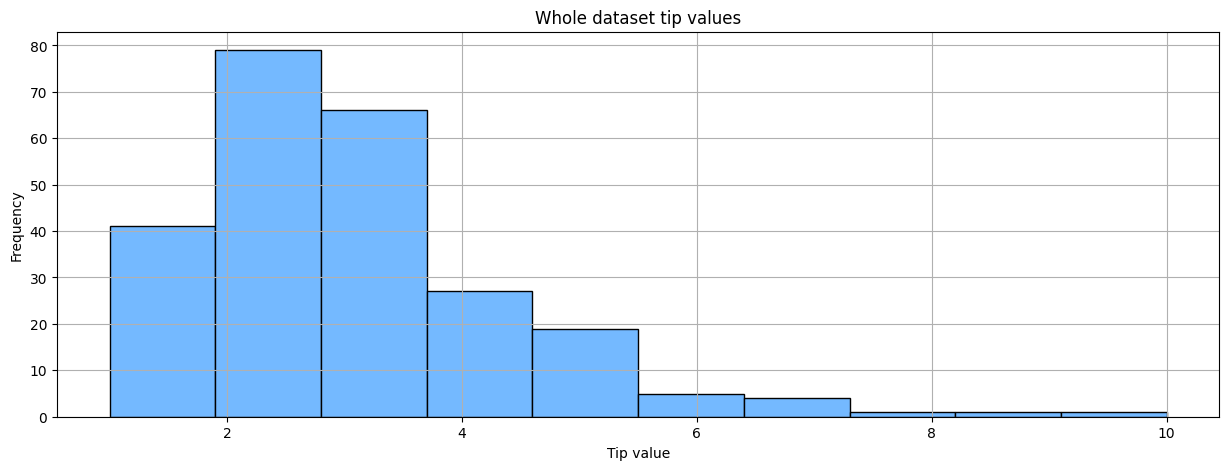

In [165]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(df1['tip'], bins=10, color='#74b9ff', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()


##### **👨 Males tips histogram**

Plot the histogram for males tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Males tip values`
* Gridlines: `show`

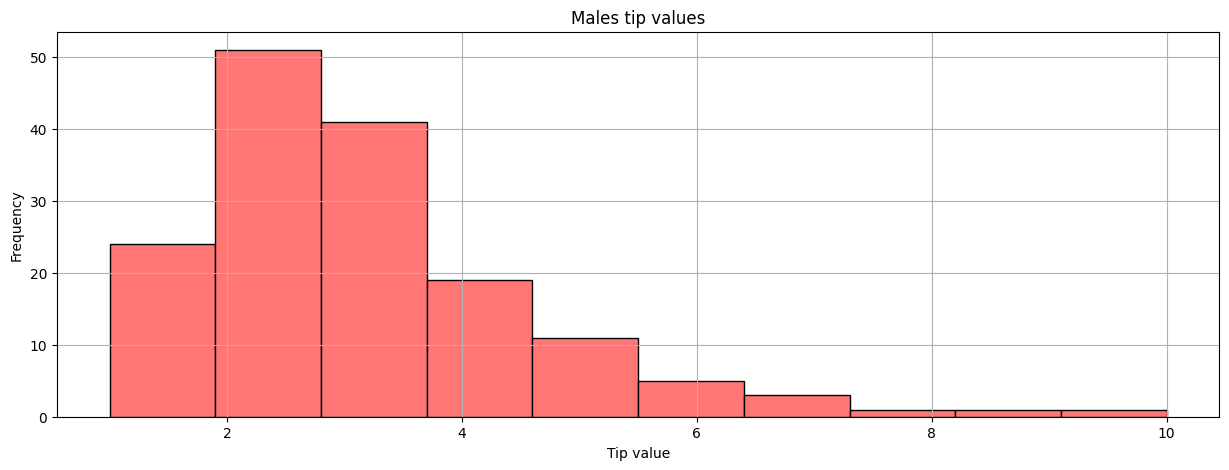

In [166]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(males_df['tip'], bins=10, color='#ff7675', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Males tip values')

plt.grid(True)
plt.show()


##### **👩 Females tips histogram**

Plot the histogram for females tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Females tip values`
* Gridlines: `show`

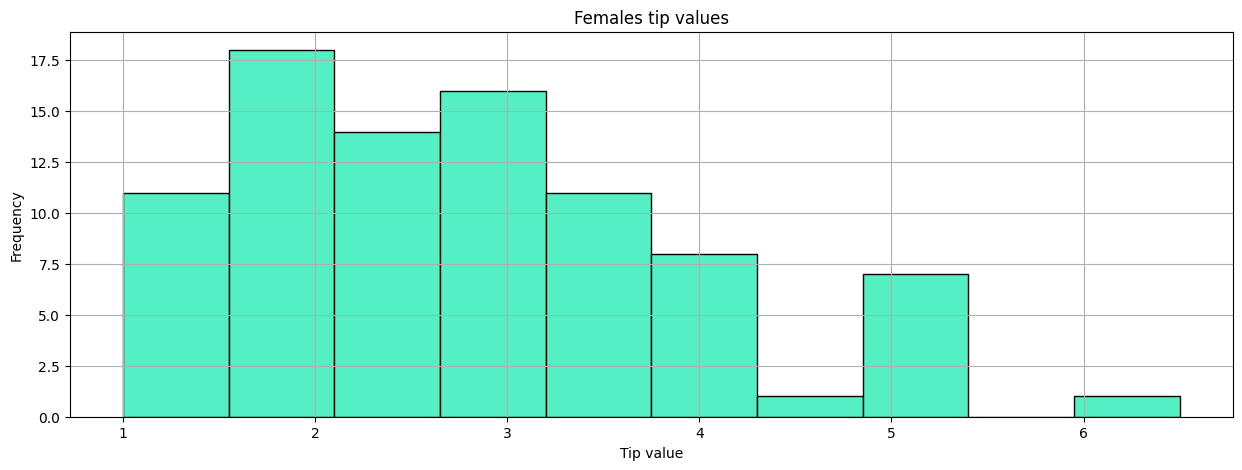

In [167]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(females_df['tip'], bins=10, color='#55efc4', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Females tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

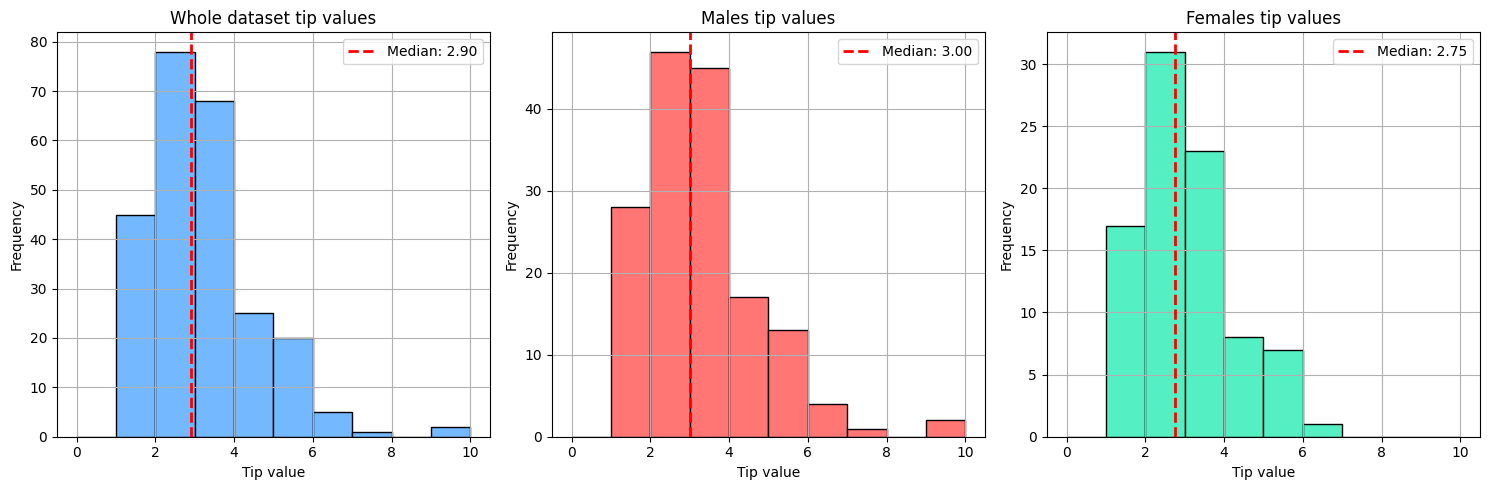

In [168]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

# all_tip
axis[0].hist(df1['tip'], bins=10, range=(0, 10), color='#74b9ff', edgecolor='black')
axis[0].axvline(common_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {common_tip_median:.2f}')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[0].legend(loc='upper right')

# males_tip
axis[1].hist(males_df['tip'], bins=10, range=(0, 10), color='#ff7675', edgecolor='black')
axis[1].axvline(males_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {males_tip_median:.2f}')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Males tip values')
axis[1].grid(True)
axis[1].legend(loc='upper right')

# females_tip
axis[2].hist(females_df['tip'], bins=10, range=(0, 10), color='#55efc4', edgecolor='black')
axis[2].axvline(females_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {females_tip_median:.2f}')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Females tip values')
axis[2].grid(True)
axis[2].legend(loc='upper right')

plt.tight_layout()
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1: Males — Tip Value Insights

  * Male customers tend to give slightly higher tips on average (\$3.00) and display a wider range of tipping behavior (clustered between \$1 and $10).
  * Most values are clustered between \$2 and \$4, and several high-value outliers (some up to \$10), this suggests more variability and possibly a greater willingness to tip higher amounts in certain cases (e.g. large bills, exceptional service).

2. Insight 2: Females — Tip Value Insights
  * Female customers tend to give slightly lower and more consistent tip amounts (concentrated in the \$2 to \$3 range), this shows habitual behavior, with most female customers tipping within a specific, modest range.
  * No tips exceed \$6.5, suggesting lower likelihood of high-end tipping, this could reflect differences in social norms, confidence in tipping, or income-related behavior.
  * The narrower distribution suggests more stable tipping patterns with less variance.

**General conclusion:**

Males tend to give slightly higher tips and show more variation, including high outliers, may be males more influenced by context (bill size, occasion, social expectations) →  Consider offering high-value incentives or premium upsells.

Females are more stable and tend to tip within a predictable band → Focus on consistency and loyalty programs, where predictability is key.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

Let's figure out the difference between weekends and weekdays in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate weekends and weekdays**

Create a new dataframe `weekends_df` containing only info about weekends.

In [169]:
# PUT YOUR CODE HERE
weekends_df = df1.query('day == "Sat" | day == "Sun"')

Check whether everything is okay. Output a test sample (5 random rows):

In [170]:
# PUT YOUR CODE HERE
weekends_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
169,169,10.63,2.0,Female,Yes,Sat,Dinner,2
46,46,22.23,5.0,Male,No,Sun,Dinner,2
20,20,17.92,4.08,Male,No,Sat,Dinner,2
73,73,25.28,5.0,Female,Yes,Sat,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


Also create another one dataframe `weekdays_df` containing only weekdays.

In [171]:
# PUT YOUR CODE HERE
weekdays_df = df1.query('day != "Sat" & day != "Sun"')

Check whether everything is okay. Output a test sample (5 random rows):

In [172]:
# PUT YOUR CODE HERE
weekdays_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
124,124,12.48,2.52,Female,No,Thur,Lunch,2
88,88,24.71,5.85,Male,No,Thur,Lunch,2
197,197,43.11,5.0,Female,Yes,Thur,Lunch,4
125,125,29.8,4.2,Female,No,Thur,Lunch,6
137,137,14.15,2.0,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Measures of central tendency for the 'tip' across the entire dataset have already been saved into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

Let's show the resulting values for whole dataset (we already have the code written 😉)

In [173]:
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🛌🗓️ Weekends**

Do the same taking into account only weekends. Use the following variables:

* min => `weekends_tip_min`
* max => `weekends_tip_max`
* mean => `weekends_tip_mean`
* median => `weekends_tip_median`

In [174]:
# YOUR CODE
weekends_tip_min = weekends_df['tip'].min()
weekends_tip_max = weekends_df['tip'].max()
weekends_tip_mean = weekends_df['tip'].mean()
weekends_tip_median = weekends_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for weekends as we did for whole dataset. Then output it.

In [175]:
# YOUR CODE
# Make a list of values
weekends_values = [weekends_tip_min, weekends_tip_max, weekends_tip_mean, weekends_tip_median]
# Round all the values to 4 decimal places
weekends_values = map(lambda x: round(x, 4), weekends_values)

# Make a dataframe from the list
weekends_mct = pd.DataFrame(weekends_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekends_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


##### **💼🗓️ Weekdays**

Now repeat it for weekdays. Use the following variables:

* min => `weekdays_tip_min`
* max => `weekdays_tip_max`
* mean => `weekdays_tip_mean`
* median => `weekdays_tip_median`

In [176]:
# YOUR CODE
weekdays_tip_min = weekdays_df['tip'].min()
weekdays_tip_max = weekdays_df['tip'].max()
weekdays_tip_mean = weekdays_df['tip'].mean()
weekdays_tip_median = weekdays_df['tip'].median()

Make the same dataframe containing the measures of central tendency for weekdays as we did for whole dataset. Then output it.

In [177]:
# YOUR CODE
# Make a list of values
weekdays_values = [weekdays_tip_min, weekdays_tip_max, weekdays_tip_mean, weekdays_tip_median]
# Round all the values to 4 decimal places
weekdays_values = map(lambda x: round(x, 4), weekdays_values)

# Make a dataframe from the list
weekdays_mct = pd.DataFrame(weekdays_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekdays_mct

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [178]:
all_day_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekends': {'min': weekends_tip_min, 'max': weekends_tip_max, 'mean': weekends_tip_mean, 'median': weekends_tip_median},
    'Weekdays': {'min': weekdays_tip_min, 'max': weekdays_tip_max, 'mean': weekdays_tip_mean, 'median': weekdays_tip_median}
}

# Make a dataframe
all_day_mct = pd.DataFrame(all_day_dict)
# Output the dataframe
all_day_mct

,Common,Weekends,Weekdays
min,1.000000,1.000000,1.00000
max,10.000000,10.000000,6.70000
mean,2.998279,3.115276,2.76284
median,2.900000,3.000000,2.50000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1:  Weekends have higher average and median tips, some tips go up to \$10.
2. Insight 2: Tips are lower and more consistent, with a lower median (\$2.50) and max value of only \$6.7.

**General conclusion:**
* People tend to tip more on weekends.
* Weekdays are lower and tighter in tip value.

#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

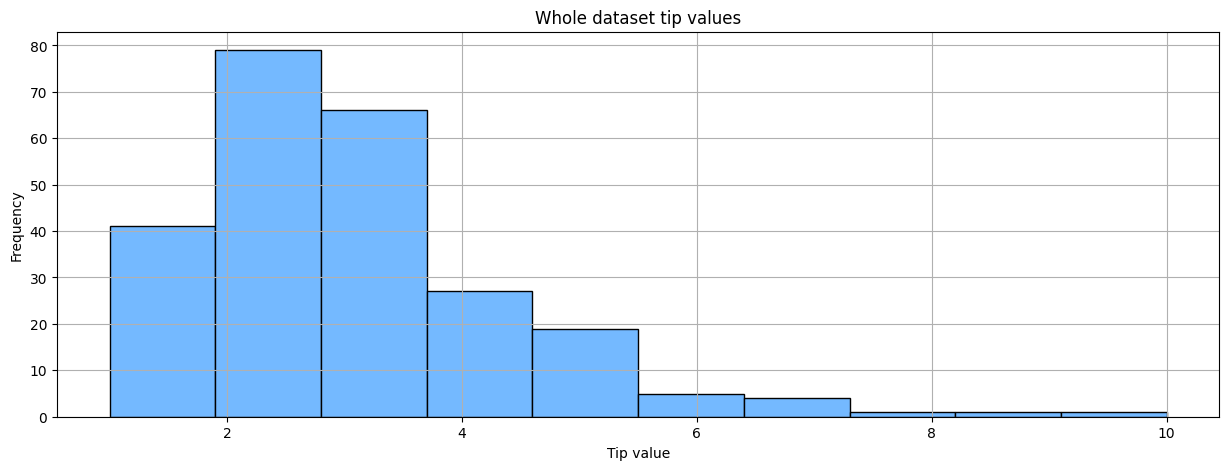

In [179]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(df1['tip'], bins=10, color='#74b9ff', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()


##### **🛌🗓️ Weekends tips histogram**

Plot the histogram for weekends tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Weekends tip values`
* Gridlines: `show`

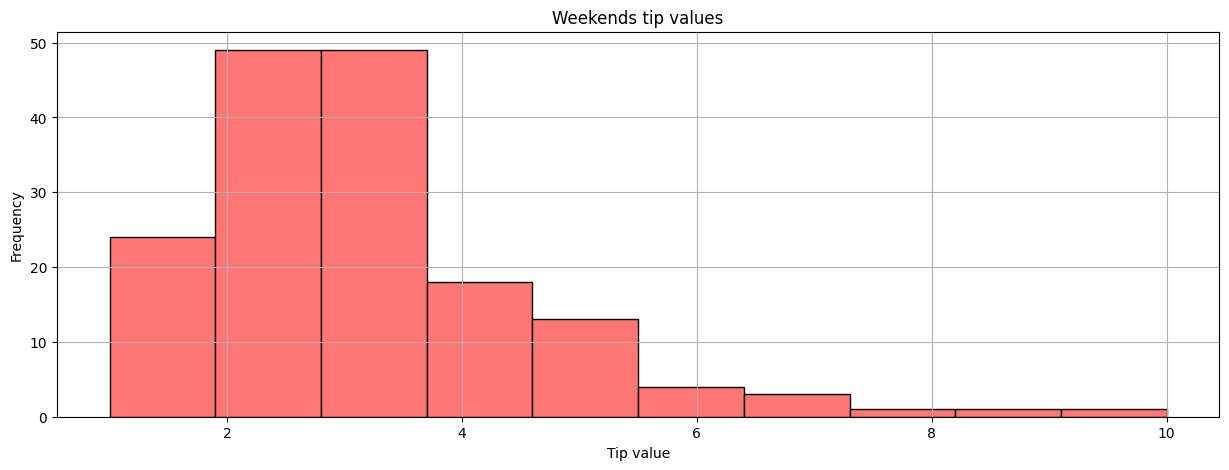

In [180]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(weekends_df['tip'], bins=10, color='#ff7675', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Weekends tip values')

plt.grid(True)
plt.show()


##### **💼🗓️ Weekdays tips histogram**

Plot the histogram for weekdays tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Weekdays tip values`
* Gridlines: `show`

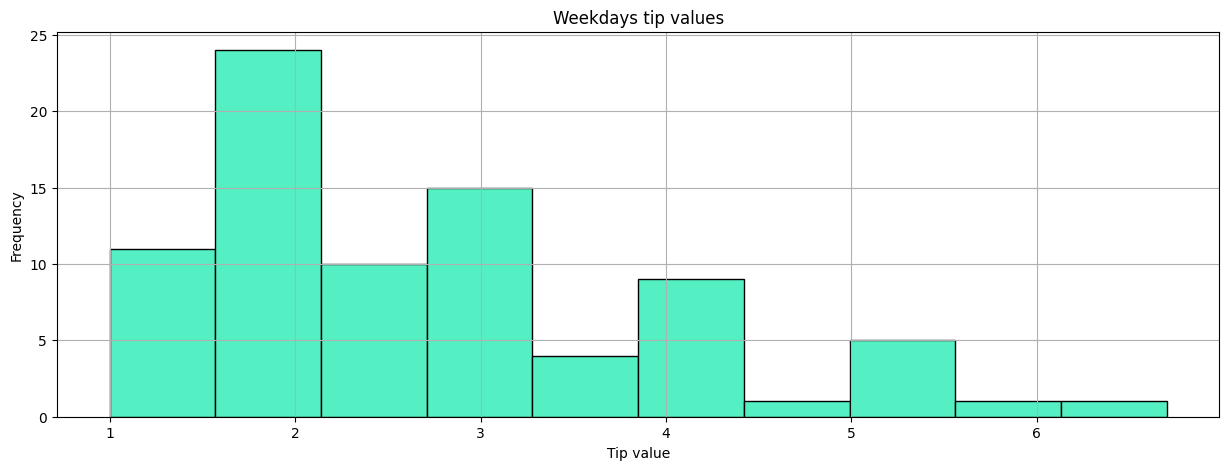

In [181]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(weekdays_df['tip'], bins=10, color='#55efc4', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Weekdays tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

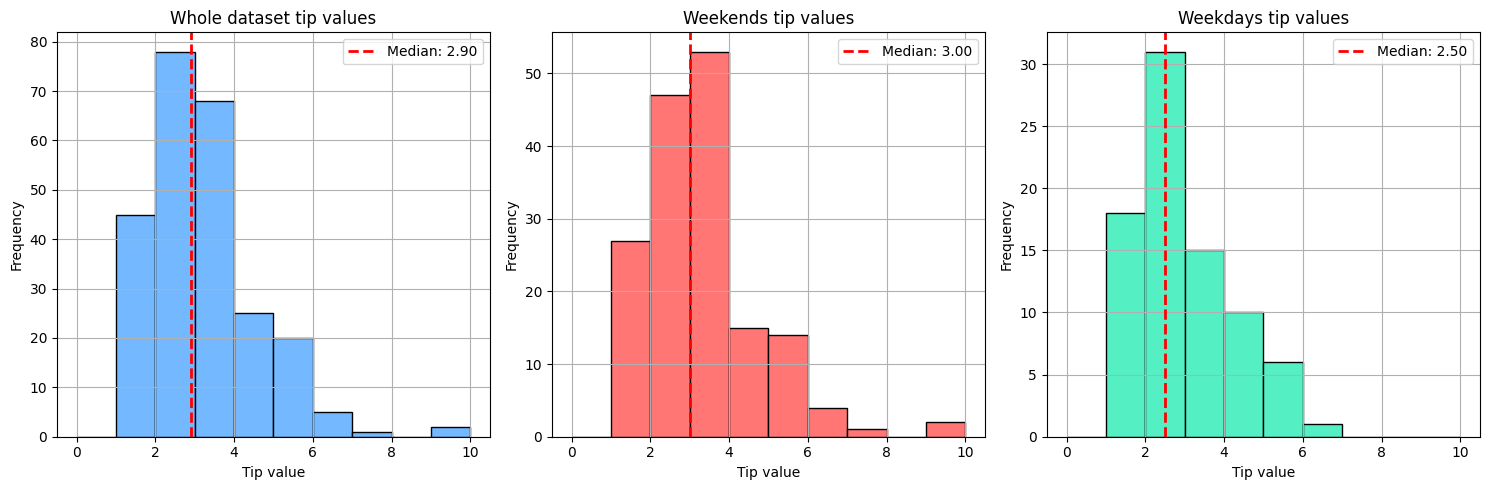

In [182]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

# all_tip
axis[0].hist(df1['tip'], bins=10, range=(0, 10), color='#74b9ff', edgecolor='black')
axis[0].axvline(common_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {common_tip_median:.2f}')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[0].legend(loc='upper right')

# weekends_tip
axis[1].hist(weekends_df['tip'], bins=10, range=(0, 10), color='#ff7675', edgecolor='black')
axis[1].axvline(weekends_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {weekends_tip_median:.2f}')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Weekends tip values')
axis[1].grid(True)
axis[1].legend(loc='upper right')

# weekdays_tip
axis[2].hist(weekdays_df['tip'], bins=10, range=(0, 10), color='#55efc4', edgecolor='black')
axis[2].axvline(weekdays_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {weekdays_tip_median:.2f}')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Weekdays tip values')
axis[2].grid(True)
axis[2].legend(loc='upper right')

plt.tight_layout()
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1: Weekends — Tip Value Insights

  * Tip values on weekends tend to be slightly higher, with a median of \$3. Most tips fall between \$2 and \$4.
  * A wide range of tip value and some outliers reach up to \$10 suggests that customers may be more generous on weekends.
  * People likely influenced by leisure activities, larger dining groups, or relaxed moods. The increased variability indicates that people are more willing to tip higher amounts, possibly in response to social events or premium service experiences.

2. Insight 2: Weekdays — Tip Value Insights
  * Tip values on weekdays are slightly lower and more consistent, with a median of \$2.50 and a narrower distribution.
  * Most tips remain between \$2 and \$3.5, with fewer extreme values, suggests that weekdays tipping are more habitual and budget-conscious, potentially reflecting quicker dining situations or routine business meals.
  * The lower variance implies stable behavior, where customers are less likely to deviate from standard tipping norms.

**General conclusion:**

Tips are generally higher and more varied on weekends, likely driven by social factors, mood, and spending behavior → opportunities for upselling, premium offerings, or service enhancements targeted at weekend crowds.

Weekday tips are more stable and predictable → strategies like efficiency, loyalty rewards, or consistent service quality may be more effective.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

Let's figure out the difference between dinners and lunches in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate dinners and lunches**

Create a new dataframe `dinners_df` containing only info about dinners.

In [183]:
# PUT YOUR CODE HERE
dinners_df = df1.query('time == "Dinner"')

Check whether everything is okay. Output a test sample (5 random rows):

In [184]:
# PUT YOUR CODE HERE
dinners_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
110,110,14.0,3.0,Male,No,Sat,Dinner,2
167,167,31.71,4.5,Male,No,Sun,Dinner,4
157,157,25.0,3.75,Female,No,Sun,Dinner,4
151,151,13.13,2.0,Male,No,Sun,Dinner,2
57,57,26.41,1.5,Female,No,Sat,Dinner,2


Also create another one dataframe `lunches_df` containing only lunches.

In [185]:
# PUT YOUR CODE HERE
lunches_df = df1.query('time == "Lunch"')

Check whether everything is okay. Output a test sample (5 random rows):

In [186]:
# PUT YOUR CODE HERE
lunches_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
86,86,13.03,2.0,Male,No,Thur,Lunch,2
144,144,16.43,2.3,Female,No,Thur,Lunch,2
198,198,13.0,2.0,Female,Yes,Thur,Lunch,2
140,140,17.47,3.5,Female,No,Thur,Lunch,2
192,192,28.44,2.56,Male,Yes,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Measures of central tendency for the 'tip' across the entire dataset have already been saved into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

Let's show the resulting values for whole dataset (we already have the code written 😉)

In [187]:
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🌙🕖 Dinners**

Do the same taking into account only dinners. Use the following variables:

* min => `dinners_tip_min`
* max => `dinners_tip_max`
* mean => `dinners_tip_mean`
* median => `dinners_tip_median`

In [188]:
# YOUR CODE
dinners_tip_min = dinners_df['tip'].min()
dinners_tip_max = dinners_df['tip'].max()
dinners_tip_mean = dinners_df['tip'].mean()
dinners_tip_median = dinners_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for dinners as we did for whole dataset. Then output it.

In [189]:
# YOUR CODE
# Make a list of values
dinners_values = [dinners_tip_min, dinners_tip_max, dinners_tip_mean, dinners_tip_median]
# Round all the values to 4 decimal places
dinners_values = map(lambda x: round(x, 4), dinners_values)

# Make a dataframe from the list
dinners_mct = pd.DataFrame(dinners_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinners_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


##### **🌤️🕑 Lunches**

Now repeat it for lunches. Use the following variables:

* min => `lunches_tip_min`
* max => `lunches_tip_max`
* mean => `lunches_tip_mean`
* median => `lunches_tip_median`

In [190]:
# YOUR CODE
lunches_tip_min = lunches_df['tip'].min()
lunches_tip_max = lunches_df['tip'].max()
lunches_tip_mean = lunches_df['tip'].mean()
lunches_tip_median = lunches_df['tip'].median()

Make the same dataframe containing the measures of central tendency for lunches as we did for whole dataset. Then output it.

In [191]:
# YOUR CODE
# Make a list of values
lunches_values = [lunches_tip_min, lunches_tip_max, lunches_tip_mean, lunches_tip_median]
# Round all the values to 4 decimal places
lunches_values = map(lambda x: round(x, 4), lunches_values)

# Make a dataframe from the list
lunches_mct = pd.DataFrame(lunches_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
lunches_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [192]:
all_time_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinners': {'min': dinners_tip_min, 'max': dinners_tip_max, 'mean': dinners_tip_mean, 'median': dinners_tip_median},
    'Lunches': {'min': lunches_tip_min, 'max': lunches_tip_max, 'mean': lunches_tip_mean, 'median': lunches_tip_median}
}

# Make a dataframe
all_time_mct = pd.DataFrame(all_time_dict)
# Output the dataframe
all_time_mct

,Common,Dinners,Lunches
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1: People tip more during dinners with mean (\$3.10) and median (\$3.00). Some tips range up to \$10.
2. Insight 2: Tipping at lunch is more modest and less variable.; both mean (\$2.73) and median (\$2.25) are below overall average; max tip only \$6.7.

**General conclusion:**
* Customers tend to tip higher at dinner.
* Lunch tipping is usually lower, more practical, and less variable.

#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

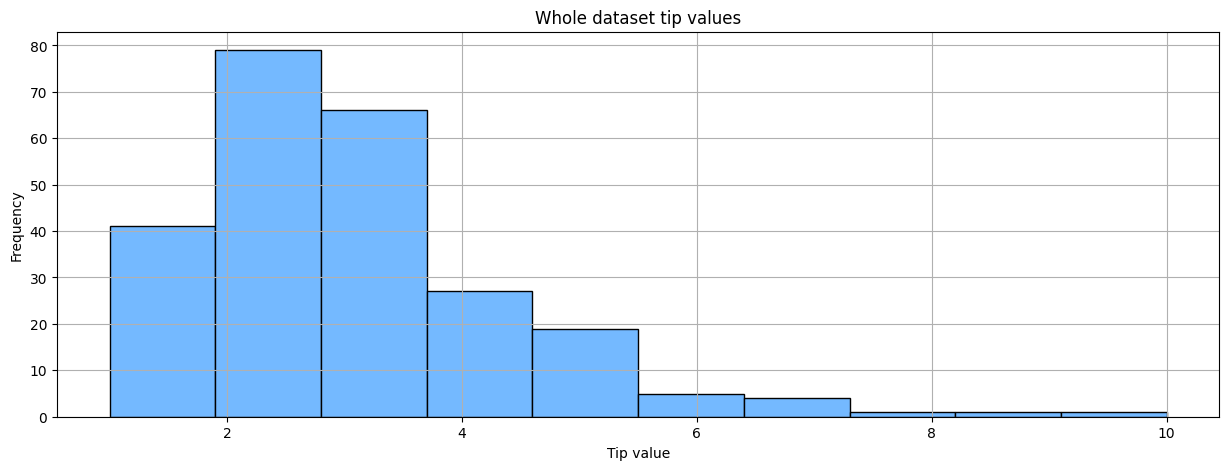

In [193]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(df1['tip'], bins=10, color='#74b9ff', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()


##### **🌙🕖 Dinners tips histogram**

Plot the histogram for dinners tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Dinners tip values`
* Gridlines: `show`

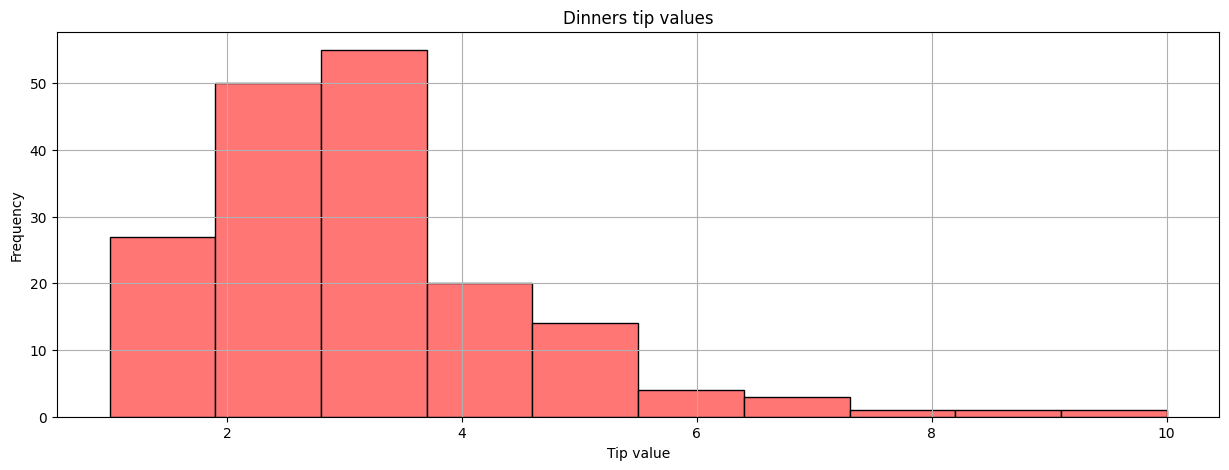

In [194]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(dinners_df['tip'], bins=10, color='#ff7675', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Dinners tip values')

plt.grid(True)
plt.show()


##### **🌤️🕑 Lunches tips histogram**

Plot the histogram for lunches tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Lunches tip values`
* Gridlines: `show`

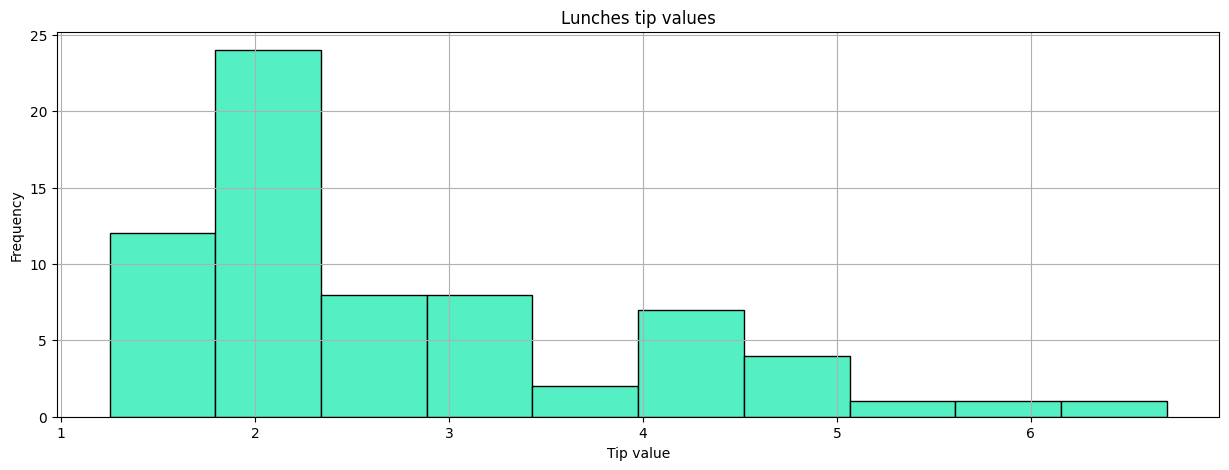

In [195]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(lunches_df['tip'], bins=10, color='#55efc4', edgecolor='black')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Lunches tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

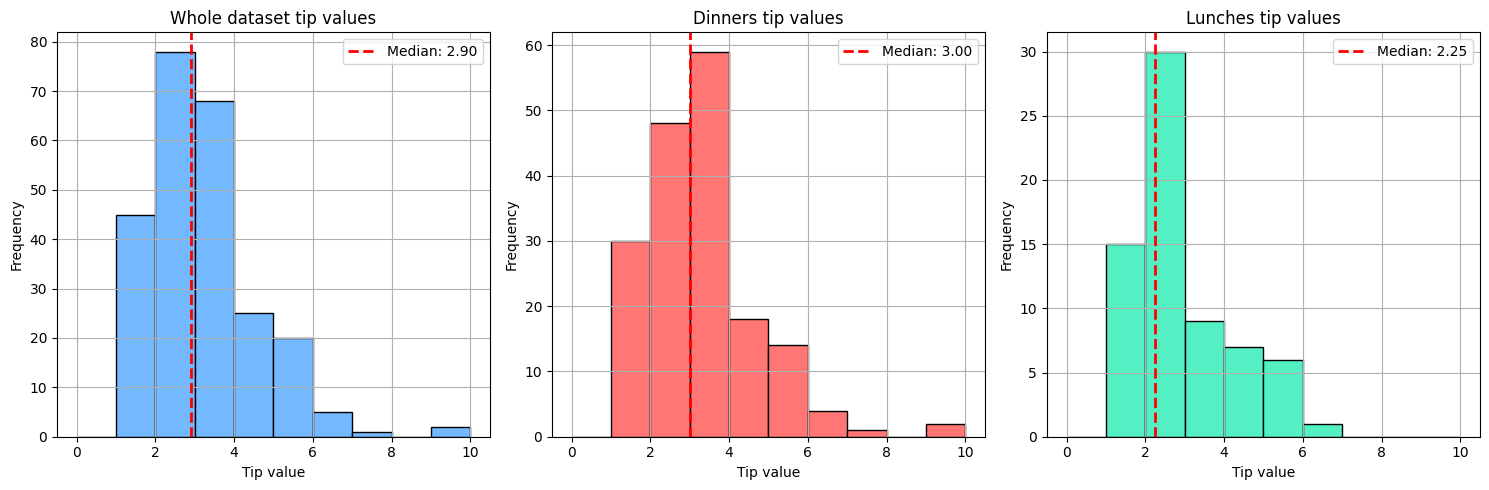

In [196]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

# all_tip
axis[0].hist(df1['tip'], bins=10, range=(0, 10), color='#74b9ff', edgecolor='black')
axis[0].axvline(common_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {common_tip_median:.2f}')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[0].legend(loc='upper right')

# dinners_tip
axis[1].hist(dinners_df['tip'], bins=10, range=(0, 10), color='#ff7675', edgecolor='black')
axis[1].axvline(dinners_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {dinners_tip_median:.2f}')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Dinners tip values')
axis[1].grid(True)
axis[1].legend(loc='upper right')

# lunches_tip
axis[2].hist(lunches_df['tip'], bins=10, range=(0, 10), color='#55efc4', edgecolor='black')
axis[2].axvline(lunches_tip_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {lunches_tip_median:.2f}')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Lunches tip values')
axis[2].grid(True)
axis[2].legend(loc='upper right')

plt.tight_layout()
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1: Dinners — Tip Value Insights

  * Dinner tips tend to be higher and more varied, with a median of $3.00. The distribution shows a strong cluster around \$2 - \$4, and high outliers up to \$10.
  * This indicates that customers are more likely to leave larger tips during dinner, potentially due to higher meal costs, longer dining times, or social dining contexts.
  * The broader spread also reflects more flexible tipping behavior, where context—such as group size, special occasions, or alcohol consumption—may influence generosity.

2. Insight 2: Lunches — Tip Value Insights
  * Lunch tip values are notably lower and more concentrated, with a median of \$2.25. The majority of tips fall between \$2 and \$3, with fewer instances of high-value tips.
  * This narrow range indicates more predictable and conservative tipping behavior, likely tied to shorter, more routine meals, such as business lunches or quick solo dining.
  * There is a lack of high-end tips (no tips exceeding \$6.7), suggesting customers are less inclined to tip generously during lunch hours.

**General conclusion:**

Dinner settings encourage more generous and varied tipping, likely driven by higher bills, social factors, and longer dining experiences → ideal for promoting upsells or premium service enhancements.

Lunch tipping is more modest and predictable, indicating a transactional nature of mid-day meals → strategies targeting lunch customers may benefit from emphasizing speed, value, and convenience rather than tipping-based incentives.